<a href="https://colab.research.google.com/github/FranciscoMichati/Redes-neuronales/blob/main/Redes_neuronales_2022_practico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algebra lineal con **SciPy**

Referencias:

* https://docs.scipy.org/doc/scipy/reference/linalg.html
* https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Inversa de una matriz

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

**a)** Use `linalg.inv()` para calcular la inversa $A^{-1}$ de la matriz

\begin{equation}
A = \bigg(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\bigg)
\end{equation}

**b)** Use `np.dot()` para chequear que $A^{-1}A \approx \mathbb{I}$, donde $\mathbb{I}$ es la matriz identidad.

**c)** Chequee que $AA^{-1} \approx \mathbb{I}$.

In [ ]:
A=np.array([[1,2],[3,4]])
print(A)
Ainv= linalg.inv(A)
print(Ainv)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


## **Ejercicio 3)** Sistema de ecuaciones lineales

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

**a)** Use `linalg.solve()` para resolver el sistema $Ax=b$ donde, $x$ es la incógnita,

\begin{equation}
A = \left(
\begin{array}{cc}
3 & 2 & 0 \\
1 & -1 & 0 \\
0 & 5 & 1
\end{array}
\right)
\end{equation}

y

\begin{equation}
b = \left(
\begin{array}{cc}
2 \\
4 \\
1 
\end{array}
\right)
\end{equation}

**b)** Chequee que $Ax=b$.

In [ ]:
A=np.matrix('3 2 0; 1 -1 0; 0 5 1')
b=np.array([2,4,1])
print(A)
print(b)

x=linalg.solve(A,b)
print(x)

[[ 3  2  0]
 [ 1 -1  0]
 [ 0  5  1]]
[2 4 1]
[ 2. -2. 11.]


## **Ejercicio 4)** Cuadrados mínimos

Dada una matriz $X$ de dimensiones $n\times m$ y un vector $y$ de dimensión $n$, la función `linalg.lstsq(X,y,...)` se usa para encontrar el vector $y$ de dimensión $m$ que minimize la norma L2 $|y-Xc|$. Notar que minimizar esta cantidad no necesariamente implica que $Xc=y$. Minimizar $|y-Xc|$ es útil para infinidad de problemas. En particular, es útil para ajustar polinomios a datos.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

**a)** Use `linalg.lstsq(X,y)` para encontrar los coeficientes $c_0, $c_1 y $c_2$ del polinomio $p(x)=c_0+c_1x+c_2x^2$ que ajuste lo mejor posible los siguientes datos

    x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
    y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

de acuerdo al método de cuadrados mínimos

\begin{eqnarray}
\min_{c_0,c_1,c_2} \sum_i (y_i-p(x_i))^2
\end{eqnarray}

**Ayuda:** Utilizar la matriz $X$ de entradas $X_{ij}=x_i^j$, i.e. la $j$-ésima potencia de $x_i$.

**b)** Con el fin de evaluar la bondad del ajuste, grafique en una misma figura:

* con símbolos los datos y
* con una curva el polinomio ajustado.

[0.0578403  0.07701453 0.11262261]
[0.24747744 0.95426797 1.70701818 2.16786025 3.25847832 6.11545013
 8.84944771]


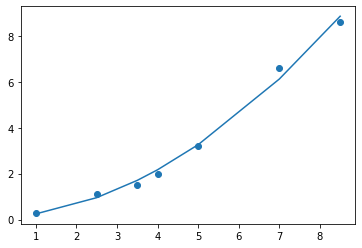

In [ ]:
x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

n=len(x)
m=3

X=np.ones((n,m))

for i in range(n):
  for j in range(m):
    X[i,j]=x[i]**j

sol=linalg.lstsq(X,y)[0]
print(sol)


ajuste=sol[0]+sol[1]*x + sol[2]*x**2

print(ajuste)

plt.scatter(x,y)
plt.plot(x,ajuste)
plt.show()

## **Ejercicio 5)** pseudo-inversa de Moore-Penrose de una matriz

La pseudo-inversa de Moore-Penrose es una generalización de la noción de inversa, que resulta útil porque existe para cualquier matriz de dimensiones y entradas arbitrarias sobre los números reales o complejos.

Si una matriz $A$ es invertible (y por ende cuadrada), existe una matriz $B$ tal $ABBA=\mathbb{I}$. Dicha matríz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^{-1}$ y se la denomina inversa de $A$. En particular, notar que $AA^{-1}A = A$ y $A^{-1}AA^{-1}=A^{-1}$. Estó último es lo que pseudo-inversa de Moore-Penrose generaliza.

Si $A$ no es invertible, luego no existe una matriz $B$ para la cual se cumpla la primera condición $AB=BA=\mathbb{I}$. Sin embargo, siempre existe una matriz $B$ para la cual se cumple $ABA = A$ y $BAB=B$. Dicha matriz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^+$ y se la denomina por pseudo-inversa de Moore-Penrose de $A$.

Referencias:

* https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv

**a)** Cree una matriz $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$ de números aleatorios generados a partir de la distribución normal de media 0 y varianza 1.

**b)** Use `linalg.pinv()` para computar la psuedo-inversa de Moore-Penrose $A^+$ de $A$.

**c)** Que dimensiones tiene $A^+$?

**d)** Use `np.allclose()` para verifique que $AA^+A\approx A$.

**e)** Verifique que $A^+AA^+\approx A^+$.

In [ ]:
mu,sigma=0,1
n,m=9,6
A=np.random.normal(mu,sigma,(9,6))
A_pseudo=linalg.pinv(A)
print(A_pseudo.shape) #tiene las dimensiones al reves que A
flag_d=np.allclose( np.matmul(A,np.matmul(A_pseudo,A)),A )
flag_e= np.allclose( np.matmul(A_pseudo,np.matmul(A,A_pseudo)),A_pseudo)
print(flag_d,flag_e)

(6, 9)
True True


## **Ejercicio 5)** Producto de Kronecker

Considere las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
A_{11} & \dots & A_{1m} \\
\vdots & \ddots & \vdots \\
A_{nm} & \dots & A_{nm}
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
B_{11} & \dots & B_{1s} \\
\vdots & \ddots & \vdots \\
B_{r1} & \dots & B_{rs}
\end{array}
\right)
\end{equation}

El producto de Kronecker es la matriz de dimensiones $nr\times ms$ dada por

\begin{equation}
A\otimes B 
= 
\left(
\begin{array}{cc}
A_{11}B & \dots & A_{1m}B \\
\vdots & \ddots & \vdots \\
A_{n1}B & \dots & A_{nm}B
\end{array}
\right)
= 
\left(
\begin{array}{cc}
B_{11}A & \dots & B_{1s}A \\
\vdots & \ddots & \vdots \\
B_{r1}A & \dots & B_{rs}A
\end{array}
\right)
\end{equation}

donde $A_{ij}B$ es un bloque de la matriz $A\otimes B$ igual al producto del escalar $A_{ij}$ por la matriz $B$.
Idem para $B_{ij}A$.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.kron.html#scipy.linalg.kron

**a)** Use `linalg.kron()` para calcular el producto de Kronecker de las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 \\
1 \\
1 \\
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este caso?

**b)** Repita para las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 & 1 & 1 
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este otro caso?

In [ ]:
A=np.matrix('1 2; 3 4')
B=np.matrix('1,1,1').T
k=linalg.kron(A,B)
print(k)

print(k.shape)

print('------------------')
B2=np.matrix('1,1,1')
k2=linalg.kron(A,B2)
print(k2)

print(k2.shape)


[[1 2]
 [1 2]
 [1 2]
 [3 4]
 [3 4]
 [3 4]]
(6, 2)
------------------
[[1 1 1 2 2 2]
 [3 3 3 4 4 4]]
(2, 6)


## **Ejercicio 5)** Autovalores y autovectores

Considere una matriz $A$ de $n\times m$. Luego, existen un conjunto de escalares $\{\lambda_1,...,\lambda_n\}$ y un correspondiente conjunto de vectores distintos $\{v_1,...,v_n\}$ tales que

\begin{eqnarray}
Av_i = \lambda_i v_i \;\;\;\; (1)
\end{eqnarray}

para todo $i\in\{1,...,n\}$. Estos $\lambda_i$ y $v_i$ se denominan autovalores y autovectores a derecha de $A$, respectivamente. Los autovalores pueden repetirse, pueden ser nulos y se los suele ordenar de mayor a menor en orden descendiente de valor absoluto: $|\lambda_1|\geq |\lambda_2|\geq ...\geq |\lambda_n|\geq 0$. Los autovectores pueden normalizarse, ya que si $v_i$ es autovector, luego $v_i/|v_i|$ también lo es.

Los autovectores constituyen una base del dominio de $A$. Esto es muy útil porque permite escribir cualquier vector $v$ en el dominio de $A$ como una combinación linal de sus autovectores

\begin{eqnarray}
v = \sum_i c_i v_i
\end{eqnarray}

Luego, calcular el producto de $A$ con $c$ resulta muy simple

\begin{eqnarray}
Av = A\left(\sum_i c_i v_i\right) = \sum_i c_iAv_i = \sum_i c_i\lambda_iv_i
\end{eqnarray}

Análogamente, existen un conjunto de escalares $\{\mu_1,...,\mu_m\}$ y un correspondiente conjunto de vectores diferentes $\{u_1,...,u_m\}$ de $A$, llamados autovalores y autovectores a izquierda de $A$, respectivamente, y son tales que

\begin{eqnarray}
u_jA = \mu_j u_j \;\;\;\; (2)
\end{eqnarray}

para todo $j\in\{1,...,m\}$.

**a)** Use `linalg.eigvals()` para calcular los autovalores a derecha de la matriz 

\begin{equation}
A = \left(
\begin{array}{cc}
0 & -1 \\
1 &  0
\end{array}
\right)
\end{equation}

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig

**b)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a derecha de $A$.

**c)** Verifique que la ecuación $(1)$ se cumple.

**d)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a izquierda de $A$.

**e)** Verifique que la ecuación $(2)$ se cumple.

## **Ejercicio 6)** Singular Value Decomposition (SVD)

Una matriz compleja $A$ de dimensiones $n\times m$ se la puede pensar como una transformación lineal $A:V\to W$ desde un espacio vectorial $V$ de dimensión $m$ a un espacio vectorial $W$ de dimensión $n$. 
A $V$ se lo suele llamar espacio de salida y a $W$ espacio de llegada.

Cualquiera sea $A$, siempre existen matrices $L$, $D$ y $R$, de dimensiones $n\times n$, $n\times m$ y $m\times m$, respectivamente, tales que $U$ y $V$ son unitarias, $S$ es diagonal y

\begin{eqnarray}
A = LDR^{\dagger} \;\;\;\; (1)
\end{eqnarray}

Los valores diagonales

\begin{eqnarray}
\sigma_i := D_{ii}
\end{eqnarray}

están definidos para todo $i\in \{1,...,k\}$, donde $k=\min(n,m)$,
se los denomina valores singulares de $A$, son todos reales, no-negativos y se los suele ordenar de mayor a menor, i.e. $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_k\geq 0$. 
El número de valores singulares no nulos es el rango de $A$.

Los vectores columna $l_1,...,l_n$ de $L$ forman una base ortonormal del espacio vectorial de llegada $W$.
Los vectores columna $r_1,...,r_m$ de $R$ forman una base ortonormal del espacio vectorial de salida $V$.
Usando estas propiedades, la ecuación $(1)$ puede reescribirse como

\begin{eqnarray}
A = \sum_{i=1}^k \sigma_i \, (l_i \otimes r_i^{\dagger}) \;\;\;\; (2)
\end{eqnarray}

donde $l_i \otimes r_i^{\dagger}$ es la matriz de dimensiones $n\times m$ resultante del producto de Kronecker entre la matriz $l_i$ de dimensiones $n\times 1$ y la matriz $r_i^{\dagger}$ de dimensiones $1\times m$.

Referencias:

* https://en.wikipedia.org/wiki/Singular_value_decomposition
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd

**a)** Cree una matriz compleja $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$, cuyas entradas $a_{ij} = x_{ij} + i y_{ij}$ se computen generando números aleatorios $x_{ij}$ e $y_{ij}$ a partir de una distribución normal de media 0 y varianza 1.

**b)** Use `linalg.svd()` para calcular la SVD de $A$. Dicha función retorna 3 arrays, digamos `L`, `s` y `Rc`, donde `L` denota a la matriz $L$, `s` denota al vector de valores singulares $(\sigma_1,\sigma_2,...,\sigma_k)$ y `Rc` denota a la matriz compleja conjugada $R^{\dagger}$.
Inspeccione las dimensiones de los arrays retornados.

**c)** Use el vector `s` para crear la matriz diagonal $D$ de dimensiones $n\times m$.

**d)** Use `np.allclose()` para verificar numéricamente la ecuación $(1)$.